In [1]:
#Working on applying Prophet to our datasets

#Importing the necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from prophet import Prophet
import pickle






In [2]:
#Read in the data
df_utahpop = pd.read_csv('../Resources/utah population 2000-2022 neilsberg.csv')
df_rmhi = pd.read_csv('../Resources/Real Median Household Income.csv')
df_ushpi = pd.read_csv('../Resources/Utah State House Price Index.csv')
with open('../Pop vs Build Permits/Resources/permits_df.pkl', 'rb') as f:
    permits_df = pickle.load(f)



display(df_rmhi.head())
display(df_ushpi.head())

#Analyze the data
display(df_utahpop.info())
display(df_utahpop.describe())
df_utahpop

display(permits_df.head())




,DATE,MEHOINUSUTA672N
0,1984-01-01,58410
1,1985-01-01,61830
2,1986-01-01,63350
3,1987-01-01,61850
4,1988-01-01,59160


,DATE,UTSTHPI
0,1975-01-01,55.14
1,1975-04-01,58.70
2,1975-07-01,55.16
3,1975-10-01,59.90
4,1976-01-01,61.79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0                        24 non-null     object
 1   Population           23 non-null     object
 2   Year on Year Change  23 non-null     object
 3   Change in Percent    23 non-null     object
dtypes: object(4)
memory usage: 900.0+ bytes


None

,,Population,Year on Year Change,Change in Percent
count,24,23,23,23
unique,24,23,23,21
top,2000,"2,244,207",-,1.68%
freq,1,1,1,2


,DATE,UTBP1FH
144,2000-01-31,944.0
145,2000-02-29,1082.0
146,2000-03-31,1312.0
147,2000-04-30,1343.0
148,2000-05-31,1363.0


In [3]:
#Transform/clean the data, if necessary

df_utahpop.rename(columns={' ':'Year'},inplace=True)
df_utahpop

df_utahpop.dropna(inplace=True)

df_utahpop.drop(df_utahpop.index[0], inplace=True)

#change column types to appropriate dtypes 

df_utahpop['Year'] = pd.to_datetime(df_utahpop['Year'], format='%Y')

columns_to_convert = ['Population', 'Year on Year Change']
for column in columns_to_convert:
    df_utahpop[column] = df_utahpop[column].str.replace(',', '').astype(int)

#set the index to the year column
df_utahpop.set_index('Year', inplace=True)

df_utahpop







,Population,Year on Year Change,Change in Percent
Year,,,
2001-01-01,2282415,38208,1.70%
2002-01-01,2322002,39587,1.73%
2003-01-01,2355755,33753,1.45%
2004-01-01,2395448,39693,1.68%
2005-01-01,2449105,53657,2.24%
2006-01-01,2513861,64756,2.64%
2007-01-01,2583023,69162,2.75%
2008-01-01,2644846,61823,2.39%
2009-01-01,2701062,56216,2.13%


array([<Axes: xlabel='Year'>, <Axes: xlabel='Year'>], dtype=object)

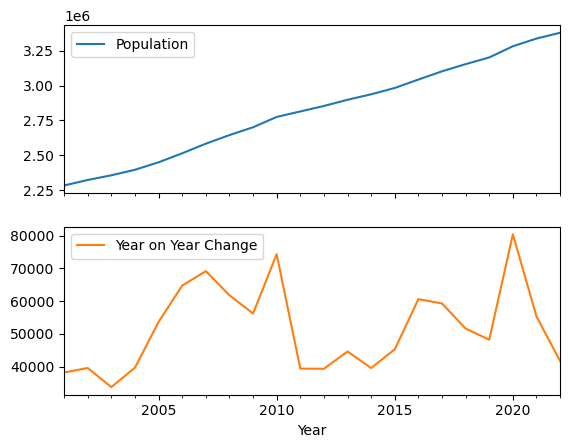

In [4]:
#Plot Dataframes
df_utahpop.plot(subplots=True)

In [5]:
#Prepare the data for Prophet
m = Prophet()
m
#Remove last two columns
df_utahpop = df_utahpop.iloc[:, :-2]
display(df_utahpop)

df_utahpop.reset_index(inplace=True)
prepped_utahpop_df = df_utahpop.rename(columns={'Year': 'ds', 'Population':'y'})


#Train the model
m.fit(prepped_utahpop_df)



,Population
Year,
2001-01-01,2282415
2002-01-01,2322002
2003-01-01,2355755
2004-01-01,2395448
2005-01-01,2449105
2006-01-01,2513861
2007-01-01,2583023
2008-01-01,2644846
2009-01-01,2701062


20:20:08 - cmdstanpy - INFO - Chain [1] start processing
20:20:08 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
#Make predictions

future_utahpop = m.make_future_dataframe(periods=5, freq="YS")
future_utahpop.tail(7)


,ds
20,2021-01-01
21,2022-01-01
22,2023-01-01
23,2024-01-01
24,2025-01-01
25,2026-01-01
26,2027-01-01


In [7]:
#Make the predictions
future_utahpop = m.predict(future_utahpop)
future_utahpop.tail(7)





,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
20,2021-01-01,1.336965e+06,3.326248e+06,3.337495e+06,1.336965e+06,1.336965e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,3.331848e+06
21,2022-01-01,1.394646e+06,3.380650e+06,3.392100e+06,1.394646e+06,1.394646e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,3.386706e+06
22,2023-01-01,1.452326e+06,3.439030e+06,3.451614e+06,1.449673e+06,1.455270e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,0.0,0.0,0.0,3.444922e+06
23,2024-01-01,1.510006e+06,3.495778e+06,3.517878e+06,1.500912e+06,1.519234e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,0.0,0.0,0.0,3.506605e+06
24,2025-01-01,1.567845e+06,3.543961e+06,3.583168e+06,1.550013e+06,1.586371e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,3.562727e+06
25,2026-01-01,1.625525e+06,3.589035e+06,3.646845e+06,1.595673e+06,1.654002e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,3.617585e+06
26,2027-01-01,1.683205e+06,3.635725e+06,3.716159e+06,1.641796e+06,1.723859e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,0.0,0.0,0.0,3.675802e+06


/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


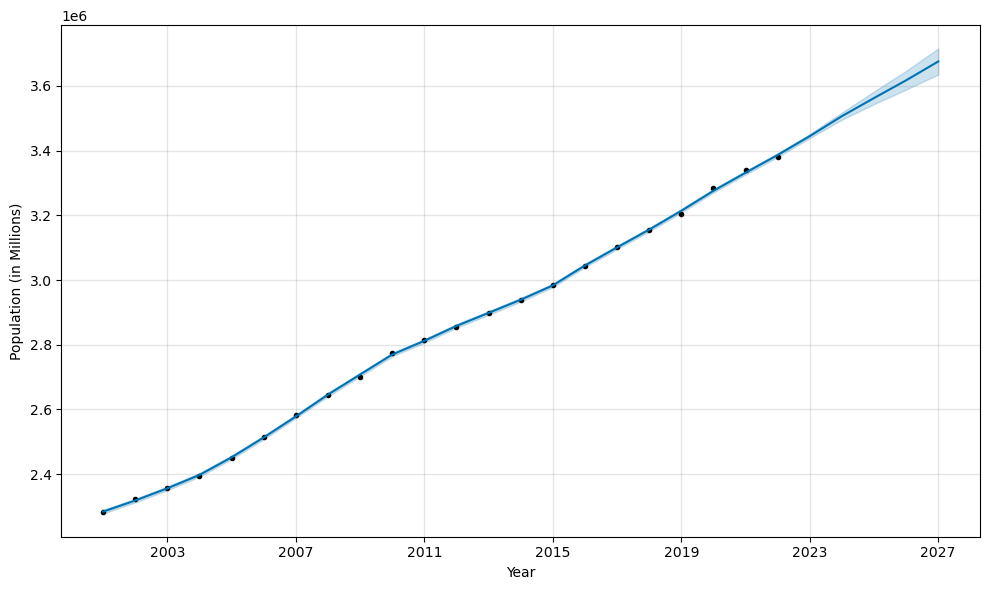

In [8]:
#Plot the predictions
fig1 = m.plot(future_utahpop, xlabel='Year', ylabel='Population (in Millions)')

/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/Users/karliebaxter/anaconda3/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of 

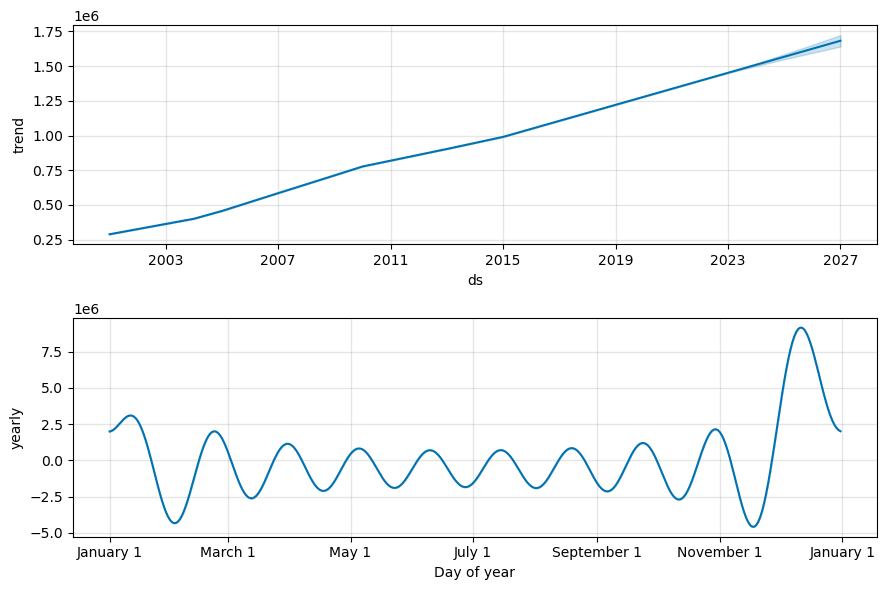

In [9]:
#Evaluate the model

fig2 = m.plot_components(future_utahpop)




In [10]:
future_utahpop

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-01,2.890699e+05,2.278195e+06,2.289776e+06,2.890699e+05,2.890699e+05,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,2.283952e+06
1,2002-01-01,3.262721e+05,2.312577e+06,2.323630e+06,3.262721e+05,3.262721e+05,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,2.318332e+06
2,2003-01-01,3.634742e+05,2.350016e+06,2.361758e+06,3.634742e+05,3.634742e+05,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,0.0,0.0,0.0,2.356070e+06
3,2004-01-01,4.006763e+05,2.391902e+06,2.403179e+06,4.006763e+05,4.006763e+05,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,0.0,0.0,0.0,2.397275e+06
4,2005-01-01,4.569700e+05,2.446354e+06,2.457737e+06,4.569700e+05,4.569700e+05,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,2.451852e+06
5,2006-01-01,5.211935e+05,2.507659e+06,2.518799e+06,5.211935e+05,5.211935e+05,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,2.513253e+06
6,2007-01-01,5.854170e+05,2.572811e+06,2.583905e+06,5.854170e+05,5.854170e+05,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,1.992596e+06,0.0,0.0,0.0,2.578013e+06
7,2008-01-01,6.491388e+05,2.640282e+06,2.651695e+06,6.491388e+05,6.491388e+05,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,1.996598e+06,0.0,0.0,0.0,2.645737e+06
8,2009-01-01,7.130353e+05,2.702105e+06,2.713173e+06,7.130353e+05,7.130353e+05,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,1.994882e+06,0.0,0.0,0.0,2.707918e+06
9,2010-01-01,7.774712e+05,2.763935e+06,2.775301e+06,7.774712e+05,7.774712e+05,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,1.992060e+06,0.0,0.0,0.0,2.769531e+06
